# Neural network with a Lambda layers

The main objective for this code is to create neural network that uses lambda layers to build dense neural netowrk using functional interface.

In [ ]:
# Loading the data
from keras.datasets import mnist  # Importing the MNIST dataset from Keras
import numpy as np
import pandas as pd

data = mnist.load_data()  # Loading the MNIST dataset
X_train, y_train = data[0][0], data[0][1]  # Extracting training data and labels
X_test, y_test = data[1][0], data[1][1]  # Extracting test data and labels

# Expanding dimensions to match expected input shape
X_train = np.expand_dims(X_train, axis=-1)  # Adding an extra dimension to training data
X_test = np.expand_dims(X_test, axis=-1)  # Adding an extra dimension to test data

# Preprocessing labels using one-hot encoding
y_train = pd.get_dummies(pd.Categorical(y_train)).values  # One-hot encoding for training labels
y_test = pd.get_dummies(pd.Categorical(y_test)).values  # One-hot encoding for test labels

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
from keras.backend import softmax
from keras.layers import Conv2D, Flatten, Dense, Lambda, Input
import tensorflow as tf
from keras.models import Model

def mish(x):
  return x * tf.math.tanh(tf.math.softplus(x))

# Creating a simple neural network
output_tensor = input_tensor = Input(X_train.shape[1:])  # Creating input tensor based on the shape of X_train
output_tensor = Conv2D(32, (3, 3))(output_tensor)  # Adding a 2D convolutional layer with 32 filters of size 3x3
output_tensor = Lambda(mish)(output_tensor)  # Applying the Mish activation function
# output_tensor = AveragePooling2D()(output_tensor)  # To make plots prettier, add more layers here
output_tensor = Flatten()(output_tensor)  # Flattening the output tensor
output_tensor = Dense(10, activation='softmax')(output_tensor)  # Adding a Dense layer with 10 units and softmax activation
model4 = Model(inputs=input_tensor, outputs=output_tensor)  # Creating a model with input and output tensors
model4.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')  # Compiling the model with categorical crossentropy loss, accuracy metrics, and Adam optimizer

In [ ]:
# training model and testing on test batch
model4.fit(X_train,y_train,epochs=8,validation_data=(X_test,y_test))

Epoch 1/8
1875/1875 [==============================] - 47s 25ms/step - loss: 0.6492 - accuracy: 0.9411 - val_loss: 0.1004 - val_accuracy: 0.9694
Epoch 2/8
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0762 - accuracy: 0.9773 - val_loss: 0.1167 - val_accuracy: 0.9661
Epoch 3/8
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.1401 - val_accuracy: 0.9652
Epoch 4/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.1843 - val_accuracy: 0.9677
Epoch 5/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0413 - accuracy: 0.9881 - val_loss: 0.2092 - val_accuracy: 0.9711
Epoch 6/8
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0360 - accuracy: 0.9902 - val_loss: 0.2103 - val_accuracy: 0.9668
Epoch 7/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0300 - accuracy: 0.9916 - val_loss: 0.2688 - val_ac

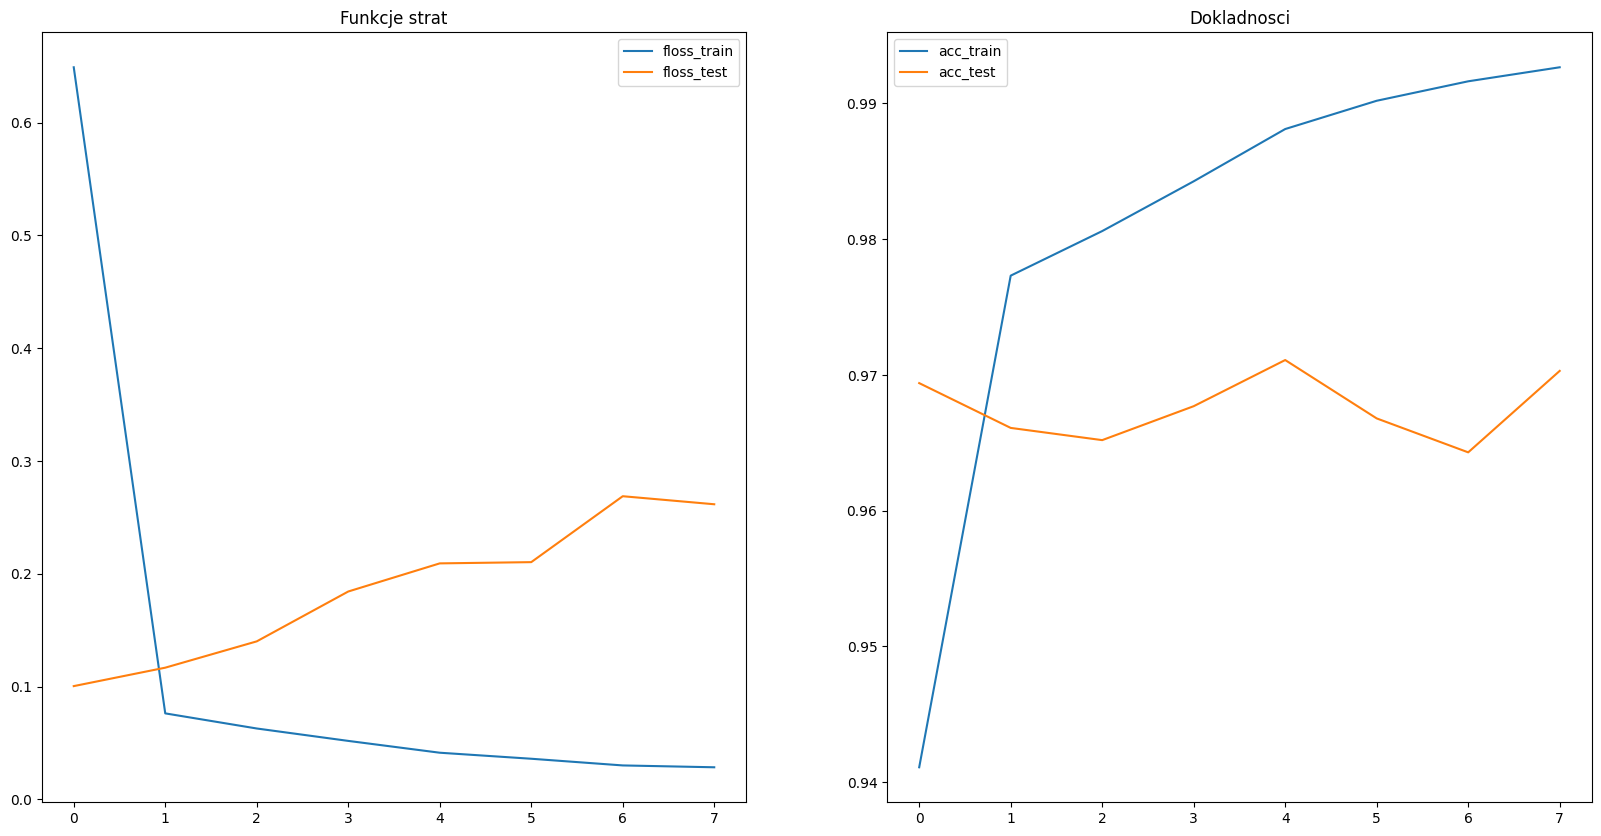

In [ ]:
# plotting the plots for loss and accuracy metrics
def generateNetworkLearningCurve(model,epchs=10):
  from matplotlib import pyplot as plt
  historia = model.history.history
  floss_train = historia['loss']
  floss_test = historia['val_loss']
  acc_train = historia['accuracy']
  acc_test = historia['val_accuracy']
  fig,ax = plt.subplots(1,2, figsize=(20,10))
  epochs = np.arange(0, epchs)
  ax[0].plot(epochs, floss_train, label='floss_train')
  ax[0].plot(epochs, floss_test, label='floss_test')
  ax[0].set_title('Funkcje strat')
  ax[0].legend()
  ax[1].set_title('Dokladnosci')
  ax[1].plot(epochs, acc_train, label='acc_train')
  ax[1].plot(epochs, acc_test, label='acc_test')
  ax[1].legend()

generateNetworkLearningCurve(model4,8)